# Body Pose to play packman

### https://www.google.com/logos/2010/pacman10-i.html

#### https://www.youtube.com/watch?v=06TE_U21FK4
#### https://www.youtube.com/watch?v=We1uB79Ci-w

## Preload libraries

In [1]:
%%time

import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
from random import random

from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.preprocessing import LabelBinarizer
from sklearn.ensemble import RandomForestClassifier


import mediapipe as mp

mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose


import pywinauto
import pyautogui
from pywinauto.keyboard import send_keys, KeySequenceError




CPU times: total: 3.73 s
Wall time: 56.6 s


## Testing the view

CPU times: total: 0 ns
Wall time: 0 ns
done in 0.8695060999999953 seconds
CPU times: total: 3.53 s
Wall time: 5.81 s


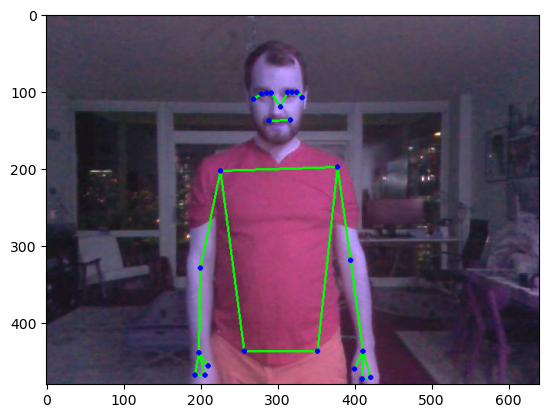

In [5]:
%%time
camera = cv2.VideoCapture(0)
return_value, image = camera.read()

image=np.real(camera.read()[1])
image = cv2.flip(image, 1)
###image = cv2.resize(image, (0,0), fx=0.2, fy=0.2) 
### testing the algorithm 
%time
##image = all_images[i] 
tic = time.perf_counter()


image_height, image_width, _ = image.shape
with mp_pose.Pose(
    static_image_mode=False,
    model_complexity=0,
    min_tracking_confidence=0.8,
    min_detection_confidence=0.2) as pose:
        
        results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

points=results.pose_landmarks   
xrow=[]
for i in range(32):
    xrow.append(points.landmark[i].x)
    xrow.append(points.landmark[i].y)
   
annotated_image = image.copy()
mp_drawing.draw_landmarks(
        annotated_image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
plt.imshow(annotated_image)
#cv2.imwrite('test.png', annotated_image)
print("done in "+str(time.perf_counter() - tic)+" seconds")
cv2.imshow('image',annotated_image)
cv2.waitKey(1000)
cv2.destroyAllWindows() 

In [3]:
cv2.destroyAllWindows()

## Collect the sample

In [14]:
#create a dataset

###https://github.com/nicknochnack/MediaPipePoseEstimation/blob/main/Media%20Pipe%20Pose%20Tutorial.ipynb
###https://github.com/nicknochnack/Body-Language-Decoder/blob/main/Body%20Language%20Decoder%20Tutorial.ipynb

# define a video capture object
camera = cv2.VideoCapture(0)
n=0
xs=[]
names=[]

with mp_pose.Pose(
        static_image_mode=False,
        model_complexity=0,
        min_tracking_confidence=0.8,
        min_detection_confidence=0.2) as pose:
 
    while(True):
        
        ### setting time
        tic = time.perf_counter()
        # Capture the video frame
        # by frame

        return_value, image = camera.read()
        image=np.real(camera.read()[1])
        image = cv2.flip(image, 1)
        results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        #### Step through all the poses we want to capture and write the instuctions on the screen
        if n<50:
            record=False
            cv2.putText(image, str("Get ready!!!!"),tuple([120, 240]), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        elif  n<75:
            move="Nothing is next"
            record=False
            cv2.putText(image, str(move+"" ),tuple([120, 340]), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        elif  n<175:
            move="4 Nothing"
            record=True
            cv2.putText(image, str(move+"" ),tuple([120, 340]), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        elif  n<200:
            move="Up is next"
            record=False
            cv2.putText(image, str(move+"" ),tuple([120, 340]), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        elif  n<300:
            move="0 Up"
            record=True
            cv2.putText(image, str(move+"" ),tuple([120, 340]), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        elif  n<325:
            move="Left is next"
            record=False
            cv2.putText(image, str(move+"" ),tuple([120, 340]), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        elif  n<425:
            move="1 Left"
            record=True
            cv2.putText(image, str(move+"" ),tuple([120, 340]), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        elif  n<450:
            move="Down is next"
            record=False
            cv2.putText(image, str(move+"" ),tuple([120, 340]), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        elif  n<550:
            move="2 Down"
            record=True
            cv2.putText(image, str(move+"" ),tuple([120, 340]), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        elif  n<575:
            move="Right is next"
            record=False
            cv2.putText(image, str(move+"" ),tuple([120, 340]), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        elif  n<675:
            move="3 Right"
            record=True
            cv2.putText(image, str(move+"" ),tuple([120, 340]), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
                      
        try:
            #Drawing the image
            mp_drawing.draw_landmarks( image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
            
            
            ## storeing points
            points=results.pose_landmarks   
            xrow=[]
            for i in range(32):
                try:
                    xrow.append(points.landmark[i].x)
                    xrow.append(points.landmark[i].y)
                    xrow.append(points.landmark[i].z)
                except:
                    xrow.append(0)
                    xrow.append(0)
                    xrow.append(0)
            if record:                  
                xs.append(xrow)
                names.append(move)
        except:
            pass
            #predicting the action


        # Display the resulting frame
        cv2.imshow('frame', image)

        # the 'q' button is set as the
        # quitting button you may use any
        # desired button of your choice
        n=n+1
        ##print (n)
        
        if (cv2.waitKey(1) & 0xFF == ord('q'))or n>675:
            break

    # After the loop release the cap object
    camera.release()
    # Destroy all the windows
    cv2.destroyAllWindows()

In [15]:
##names

### Transforming the sample of images into points

## Create the model

In [16]:
## Create the modelq

tic = time.perf_counter()

encoder = LabelBinarizer()
y_train= encoder.fit_transform(names)
### https://www.datacamp.com/community/tutorials/decision-tree-classification-python
# Create Decision Tree classifer object
## train random forest instead
clf=RandomForestClassifier(n_estimators=40, max_depth=5)
clf = clf.fit(xs,y_train)

#Predict the response for test dataset
y_pred = clf.predict(xs)
print("Accuracy:",metrics.accuracy_score(y_train, y_pred))

print("done in "+str(time.perf_counter() - tic)+" seconds")
##https://mljar.com/blog/save-load-random-forest/
###joblib.dump(clf, "./random_forest.joblib")

Accuracy: 1.0
done in 0.4125516000000289 seconds


In [17]:
i=0
print(y_pred[i])
print(names[i])

[0 0 0 0 1]
4 Nothing


## Main Function

#### Quit it with Q

In [19]:
## Main Function
####https://www.youtube.com/watch?v=06TE_U21FK4
camera = cv2.VideoCapture(0)
return_value, image = camera.read()
w,l=pyautogui.size()  
pyautogui.PAUSE = 0.051
pyautogui.click(w/2, l/2)
kp="unknown"

# define a video capture object
camera = cv2.VideoCapture(0)
with mp_pose.Pose(
        static_image_mode=False,
        model_complexity=0,
        min_tracking_confidence=0.8,
        min_detection_confidence=0.2) as pose:
 
    while(True):
        ### setting time
        tic = time.perf_counter()
        # Capture the video frame
        # by frame

        return_value, image = camera.read()
        image=np.real(camera.read()[1])
        image = cv2.flip(image, 1)
        results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        
        try:
            #Drawing the image
            mp_drawing.draw_landmarks( image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
            
            ## storeing points
            points=results.pose_landmarks   
            xrow=[]
            for i in range(32):
                try:
                    xrow.append(points.landmark[i].x)
                    xrow.append(points.landmark[i].y)
                    xrow.append(points.landmark[i].z)
                except:
                    xrow.append(0)
                    xrow.append(0)
                    xrow.append(0)
            #predicting the action
            xs_test=[]
            xs_test.append(xrow)
            y_pred_test = clf.predict(xs_test)
            #### pressing the button based on the acction
            i=0


            if (y_pred_test[i][4]==1):
                    send_keys("{up}")
                    k="nothing"
                    kp="nothing"
            elif (y_pred_test[i][0]==1):
                    k="up"
                    kp="up"
                    send_keys('{VK_UP down}')
            elif (y_pred_test[i][1]==1):
                    k="left"
                    kp="left"
                    send_keys('{VK_LEFT down}')
            elif (y_pred_test[i][2]==1):
                    k="down"
                    kp="down"
                    send_keys('{VK_DOWN down}')
            elif (y_pred_test[i][3]==1):
                    k="right"
                    kp="right"       
                    send_keys('{VK_RIGHT down}')
            else:
            
                    k="unknown"
                    kp="unknown"
                    send_keys("{up}") 
            
           ## cv2.putText(image, str(k),tuple([120, 240]), cv2.FONT_HERSHEY_SIMPLEX, 3, (255, 255, 255), 2, cv2.LINE_AA)
            
            ##result=( "said "+k+"| in "+str(round(time.perf_counter() - tic,2)) )
            ##print( result)

        except:
            pass
            #predicting the action
            ##cv2.putText(image, str(k),tuple([120, 240]), cv2.FONT_HERSHEY_SIMPLEX, 3, (255, 255, 255), 2, cv2.LINE_AA)

        # Display the resulting frame
        cv2.imshow('frame', image)

        # the 'q' button is set as the
        # quitting button you may use any
        # desired button of your choice
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # After the loop release the cap object
    camera.release()
    # Destroy all the windows
    cv2.destroyAllWindows()

In [31]:
cv2.destroyAllWindows()